<a href="https://colab.research.google.com/github/manojcodes93/Netflix-Customer-Churn-EDA/blob/main/Netflix_Churn_Data_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import all the essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/netflix_customer_churn.csv")
data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [5]:
data.shape # Shows the no of columns and rows from the data

(5000, 14)

In [6]:
data.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [7]:
data.describe(include = "object")

,customer_id,gender,subscription_type,region,device,payment_method,favorite_genre
count,5000,5000,5000,5000,5000,5000,5000
unique,5000,3,3,6,5,5,7
top,82aeef39-ddb0-40ad-bae1-5c436e0cf042,Female,Premium,South America,Tablet,Debit Card,Drama
freq,1,1711,1693,873,1048,1030,731


In [8]:
data.dtypes

,0
customer_id,object
age,int64
gender,object
subscription_type,object
watch_hours,float64
last_login_days,int64
region,object
device,object
monthly_fee,float64
churned,int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [10]:
data.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


In [11]:
data.churned.value_counts()

,count
churned,
1,2515
0,2485


In [12]:
data_copy = data.copy()

<Axes: >

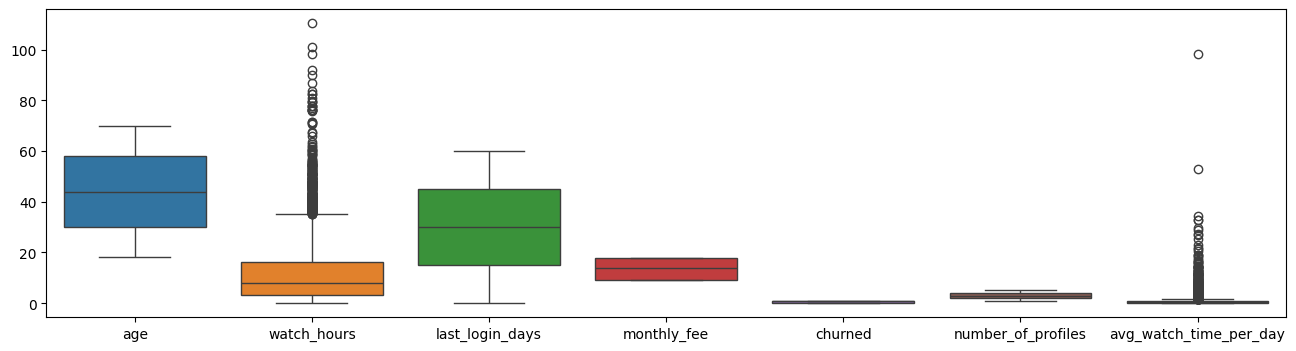

In [13]:
# To find outliers
plt.figure(figsize = (16,4))
sns.boxplot(data = data_copy)

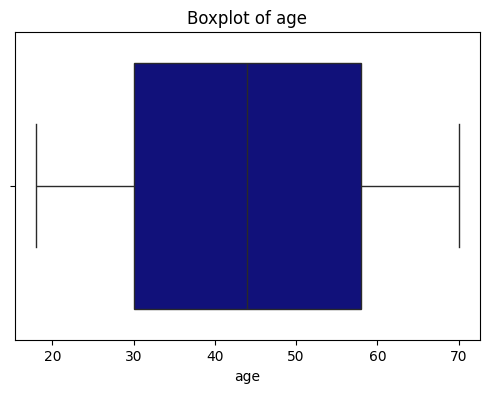

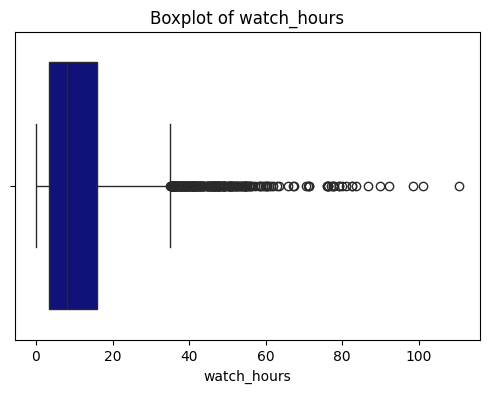

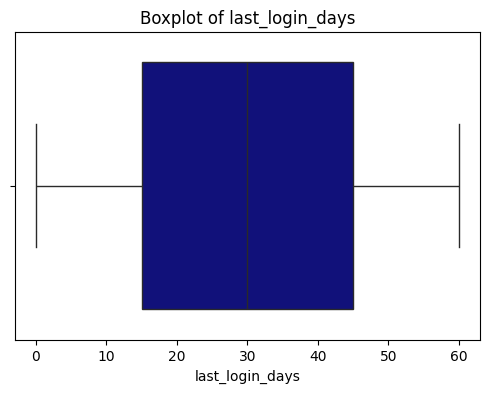

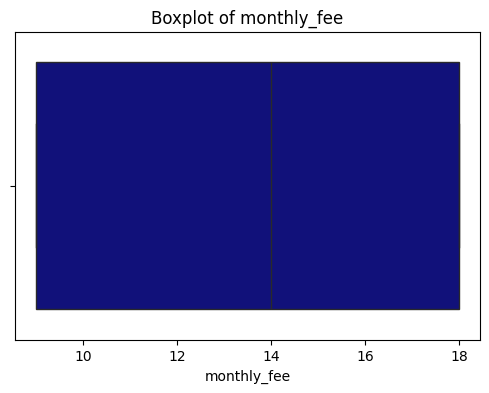

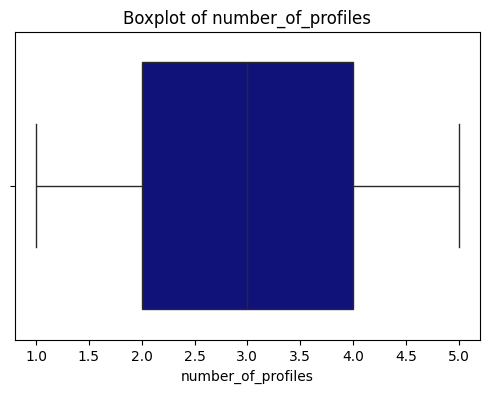

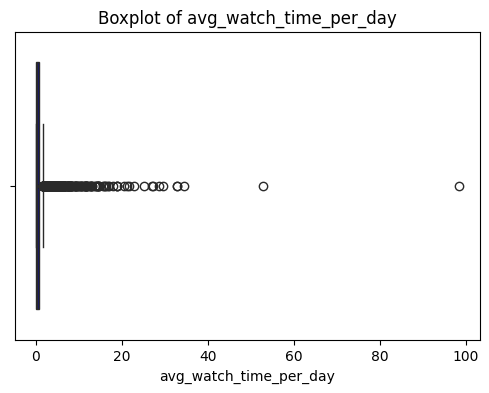

In [14]:
# Other way
#Numerical Data
num_data = ["age", "watch_hours", "last_login_days", "monthly_fee","number_of_profiles", "avg_watch_time_per_day"]

for i in num_data:
  plt.figure(figsize=(6,4))
  sns.boxplot(x = data_copy[i], color = "darkblue")
  plt.title(f"Boxplot of {i}")
  plt.show()

##Let's find the outliers in watch_hours

In [15]:
data_copy.watch_hours.max()

110.4

In [16]:
bins = [0, 20, 40, 60, 80, 100, 120]
labels = [
    "0-20",
    "20-40",
    "40-60",
    "60-80",
    "80-100",
    "100-120"
]

data_copy["watch_hours_binned"] = pd.cut(data_copy["watch_hours"], bins=bins, labels=labels)

In [17]:
data_copy["watch_hours_binned"].value_counts()

,count
watch_hours_binned,
0-20,4117
20-40,711
40-60,136
60-80,26
80-100,8
100-120,2


## Now let's remove the outliers

In [18]:
filtered_data = data_copy[data_copy["watch_hours"] < 60]

In [19]:
filtered_data.watch_hours.max()

59.99

In [20]:
bins = [0,15,30,45,60]
labels = ["0-15","15-30","30-45","45-60"]

filtered_data["watch_hours_binned"] = pd.cut(filtered_data["watch_hours"], bins = bins, labels = labels)

/tmp/ipython-input-159117071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["watch_hours_binned"] = pd.cut(filtered_data["watch_hours"], bins = bins, labels = labels)


In [21]:
filtered_data.watch_hours_binned.value_counts()

,count
watch_hours_binned,
0-15,3646
15-30,989
30-45,238
45-60,91


##Now let's find outliers in watch_hours_per_day

In [22]:
filtered_data.avg_watch_time_per_day.max()

52.8

In [23]:
bins = [0,10,20,30,40,50,60]
labels = ["0-10","10-20","20-30","30-40","40-50","50-60"]

filtered_data["avg_watch_time_per_day_binned"] = pd.cut(filtered_data["avg_watch_time_per_day"], bins = bins, labels = labels)

/tmp/ipython-input-2766230238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["avg_watch_time_per_day_binned"] = pd.cut(filtered_data["avg_watch_time_per_day"], bins = bins, labels = labels)


In [24]:
filtered_data["avg_watch_time_per_day_binned"].value_counts()

,count
avg_watch_time_per_day_binned,
0-10,4858
10-20,41
20-30,9
30-40,3
50-60,1
40-50,0


## Now let's remove the outliers

In [25]:
filtered_data = filtered_data[filtered_data["avg_watch_time_per_day"] < 10]

In [26]:
filtered_data["avg_watch_time_per_day"].max()

9.81

In [27]:
bins = [0,2.5,5.0,7.5,10.0]
labels = ["0-2.5","2.5-5.0","5.0-7.5","7.5-10.0"]

filtered_data["avg_watch_time_per_day_binned"] = pd.cut(filtered_data["avg_watch_time_per_day"], bins = bins, labels = labels)

In [28]:
filtered_data.avg_watch_time_per_day_binned.value_counts()

,count
avg_watch_time_per_day_binned,
0-2.5,4597
2.5-5.0,178
5.0-7.5,58
7.5-10.0,25


##There are still outliers greater than 2.5

##So let's remove values greater than 2

In [29]:
filtered_data = filtered_data[filtered_data["avg_watch_time_per_day"] < 2]

In [30]:
bins = [0,0.5,1.0,1.5,2.0]
labels = ["0-0.5","0.5-1.0","1.0-1.5","1.5-2.0"]

filtered_data["avg_watch_time_per_day_binned"] = pd.cut(filtered_data["avg_watch_time_per_day"], bins = bins, labels = labels)

In [31]:
filtered_data.avg_watch_time_per_day_binned.value_counts()

,count
avg_watch_time_per_day_binned,
0-0.5,3258
0.5-1.0,797
1.0-1.5,293
1.5-2.0,147


In [32]:
filtered_data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hours_binned,avg_watch_time_per_day_binned
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,0-15,0-0.5
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,0-15,0-0.5
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,15-30,1.0-1.5
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,0-15,0-0.5
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,0-15,0-0.5


In [33]:
filtered_data.dropna(subset = ["avg_watch_time_per_day_binned"], inplace = True)

In [34]:
filtered_data.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


## Univariate Analysis

In [88]:
numeric_data = filtered_data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

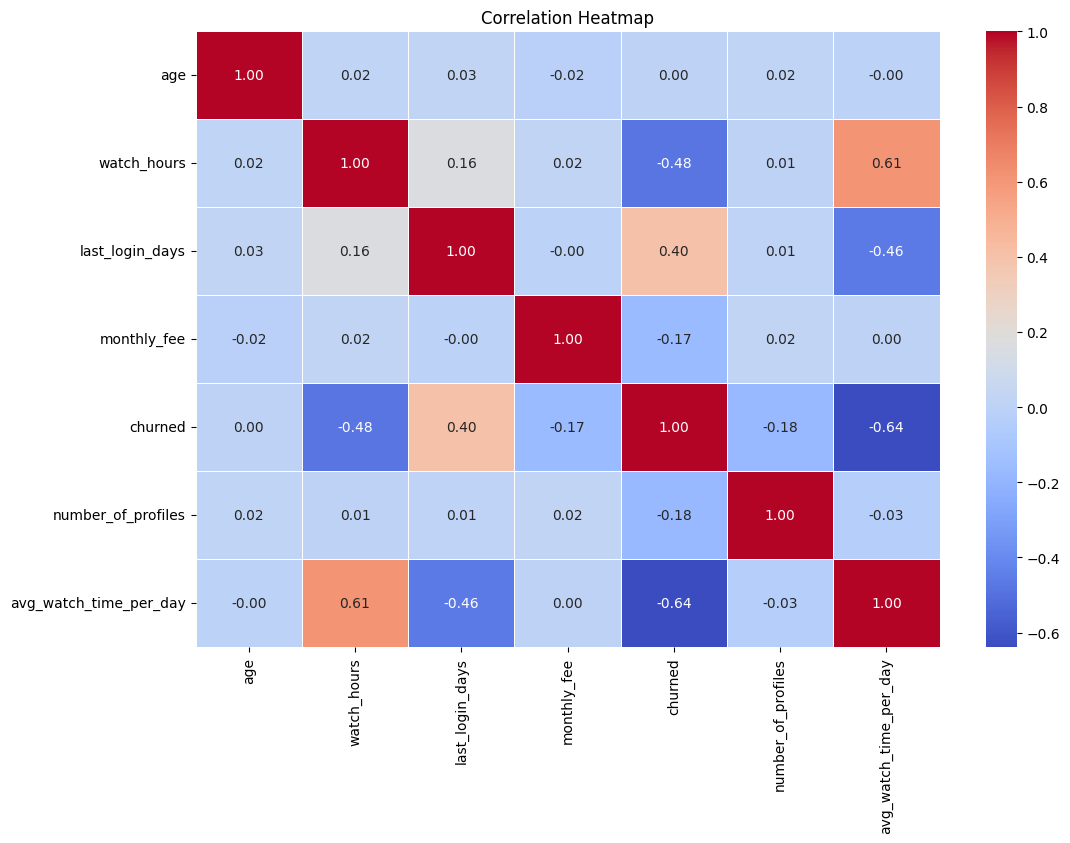

In [91]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [35]:
filtered_data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hours_binned,avg_watch_time_per_day_binned
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,0-15,0-0.5
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,0-15,0-0.5
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,15-30,1.0-1.5
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,0-15,0-0.5
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,0-15,0-0.5


In [36]:
filtered_data.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000
mean,43.838710,10.266701,32.294327,13.695228,0.547942,3.033593,0.403208
std,15.475881,9.690665,16.444480,3.693727,0.497752,1.413263,0.414675
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.010000
25%,30.000000,3.110000,19.000000,8.990000,0.000000,2.000000,0.100000
50%,44.000000,7.350000,33.000000,13.990000,1.000000,3.000000,0.260000
75%,58.000000,14.325000,46.000000,17.990000,1.000000,4.000000,0.550000
max,70.000000,59.710000,60.000000,17.990000,1.000000,5.000000,1.990000


In [37]:
# Convert all numerical data into categorical data for univariate and bivariate analysis
# Create bins to the age column

bins = [0, 15, 30, 45, 60, 75]
labels = ["0-15", "15-30", "30-45", "45-60", "60-75"]

filtered_data["age_binned"] = pd.cut(filtered_data["age"], bins=bins, labels=labels)

In [38]:
# Create bins to the last_login_days column

bins = [0,12,24,36,48,60]
labels = ["0-12","12-24","24-36","36-48","48-60"]

filtered_data["last_login_days_binned"] = pd.cut(filtered_data["last_login_days"], bins = bins, labels = labels)

In [39]:
# Creating bins to Monthly fee column

bins = [0,4,8,12,16,20]
labels = ["0-4","4-8","8-12","12-16","16-20"]

filtered_data["monthly_fee_binned"] = pd.cut(filtered_data["monthly_fee"], bins = bins, labels = labels)

In [40]:
filtered_data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hours_binned,avg_watch_time_per_day_binned,age_binned,last_login_days_binned,monthly_fee_binned
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,0-15,0-0.5,45-60,24-36,8-12
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,0-15,0-0.5,45-60,12-24,12-16
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,15-30,1.0-1.5,15-30,0-12,12-16
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,0-15,0-0.5,45-60,0-12,16-20
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,0-15,0-0.5,45-60,12-24,12-16


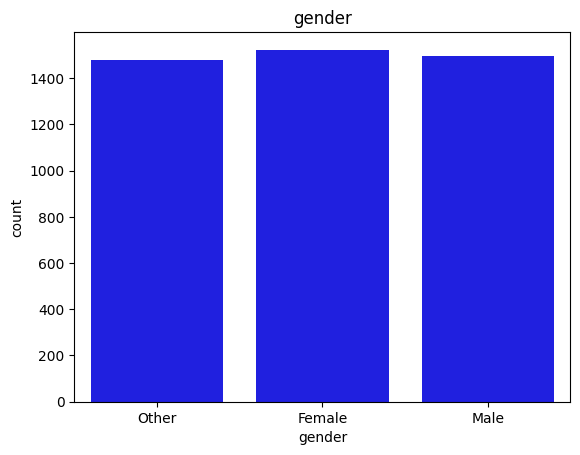

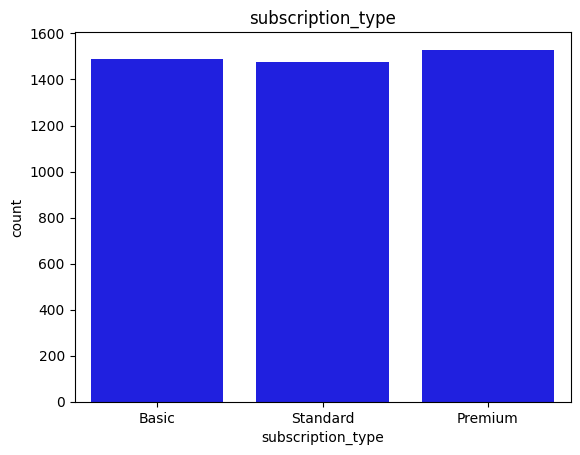

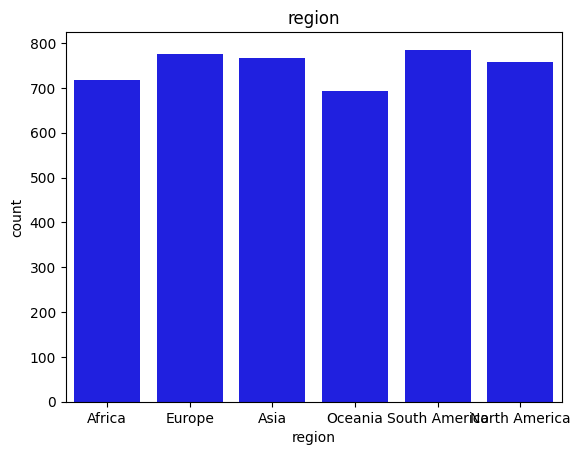

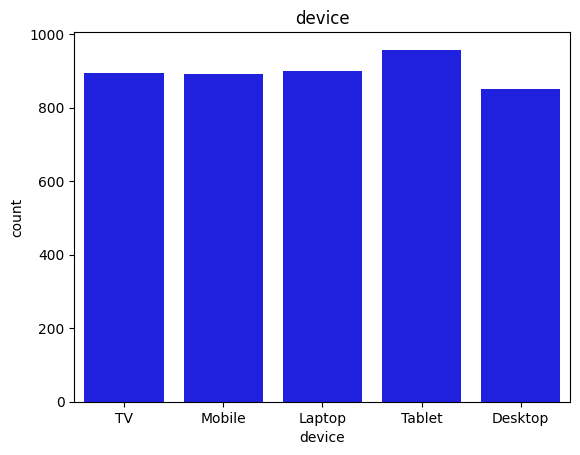

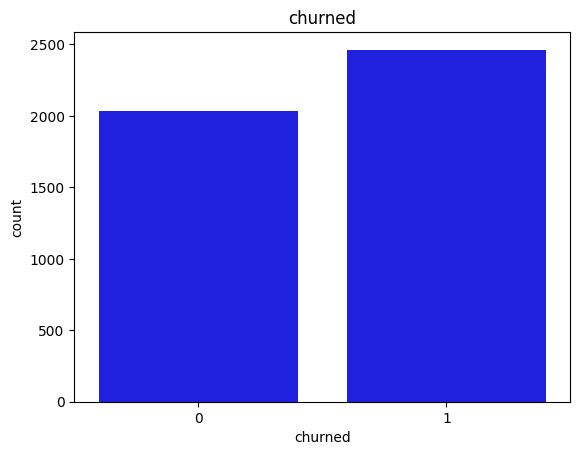

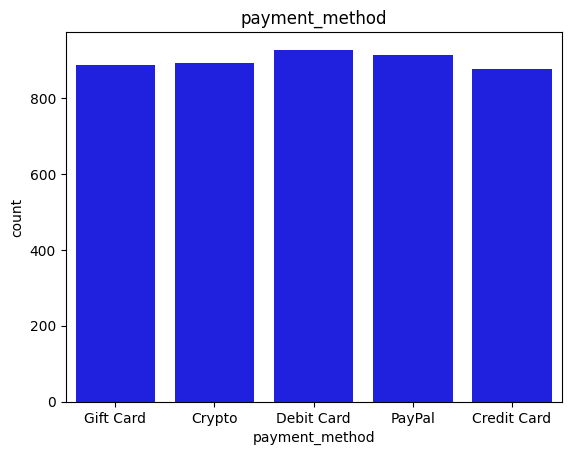

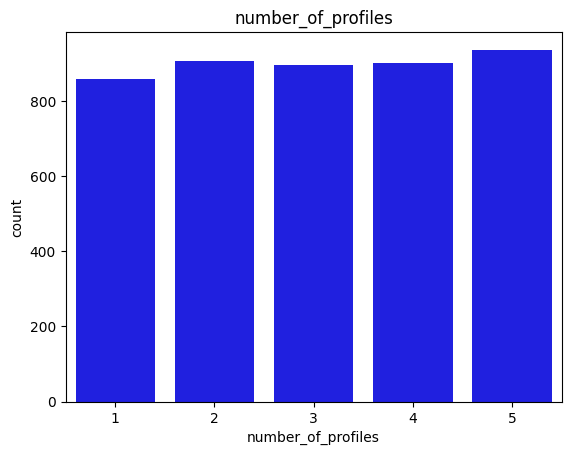

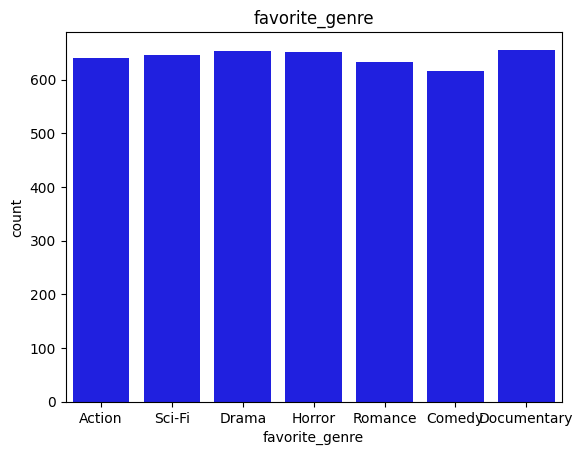

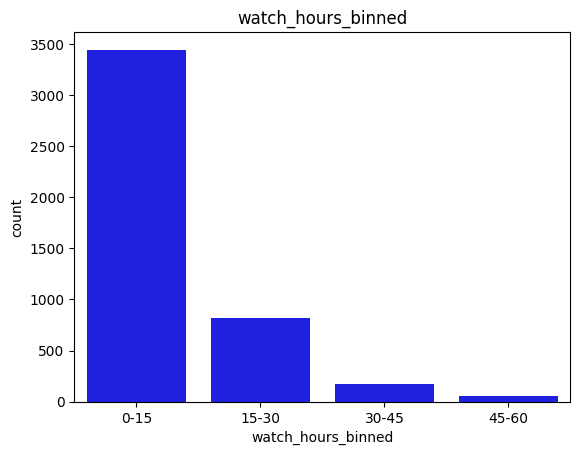

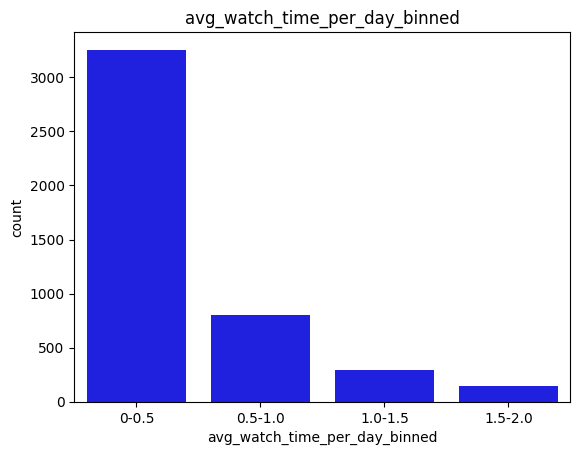

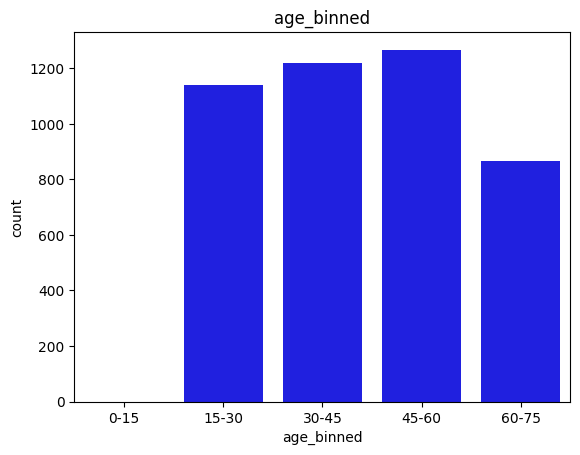

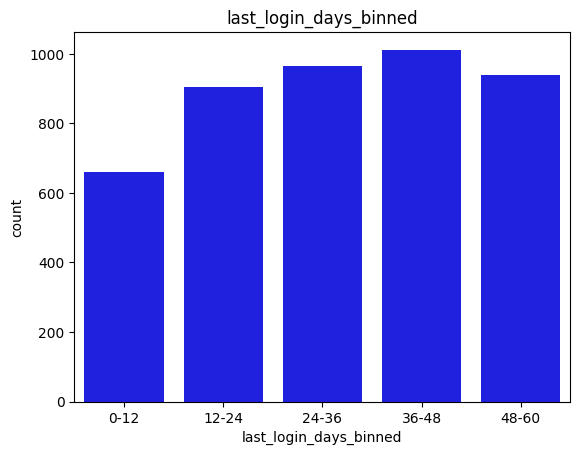

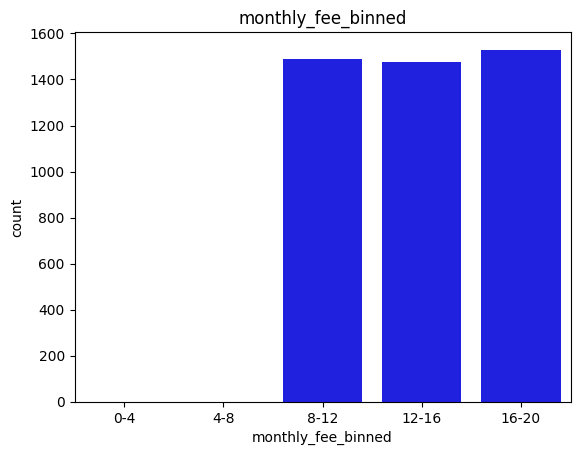

In [41]:
for i, col in enumerate(filtered_data[filtered_data.drop(columns = ["customer_id", "age","watch_hours", "last_login_days", "monthly_fee", "avg_watch_time_per_day"]).columns]):
  plt.figure()
  sns.countplot(data = filtered_data,x = col, color = "blue")
  plt.title(col)
  plt.show()


## Insights

**From Chrun**
- More users have churned than have not churned. This shows that there is a problem with customer retention.

**Average Watch Time per Day**
- A large majority of users watch less than half an hour of content per day. The number of users decreases as the average watch time increases.

**From Last Login**
- The most common last login time for users is within the 36-48 day bin.

**Total Watch Hours**
- Most users have watched less than 15 hours of content in total. Similar to the daily watch time, the count of users drops sharply as the total watch hours increase.

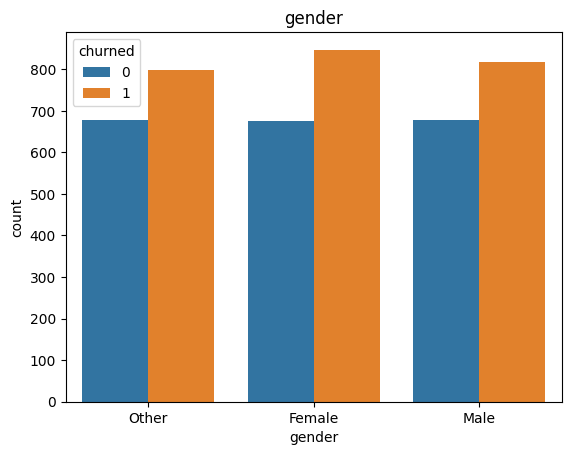

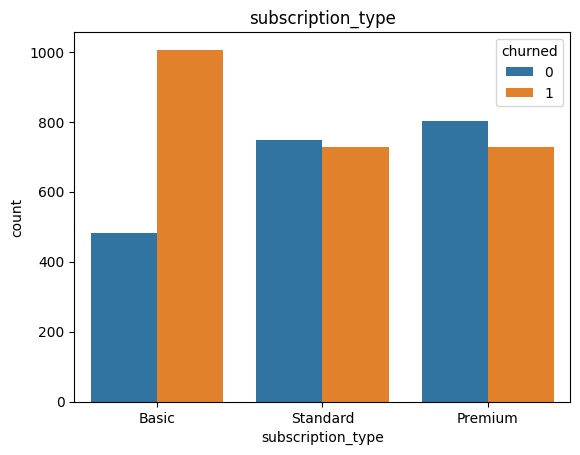

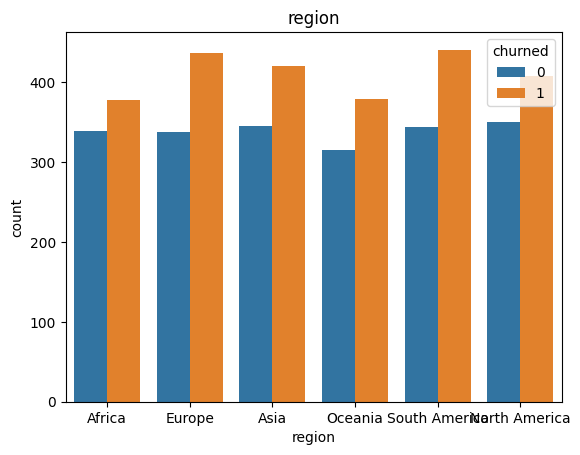

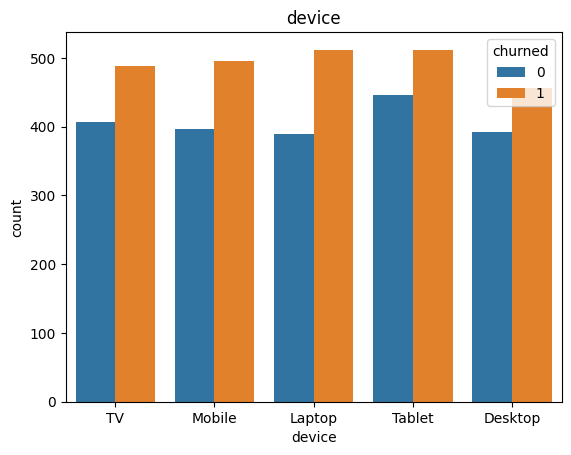

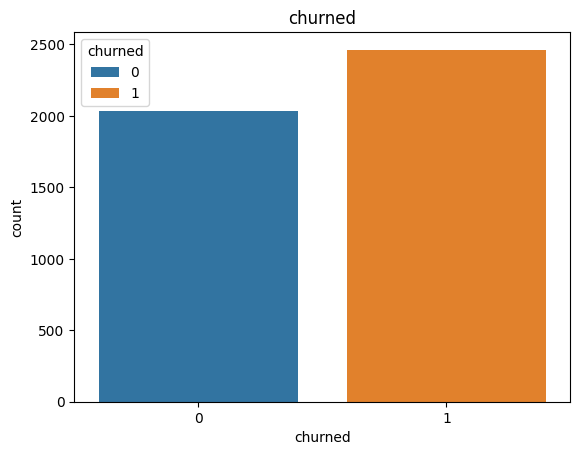

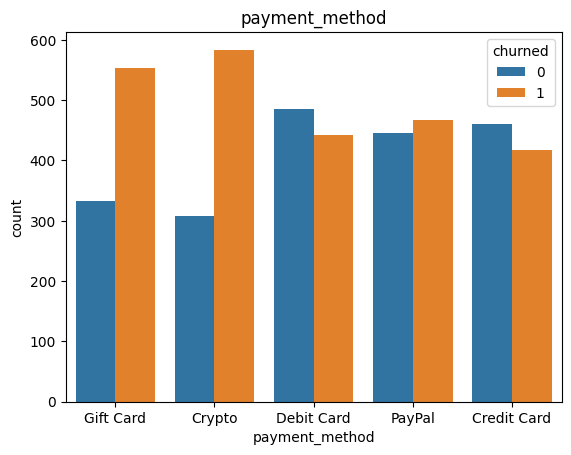

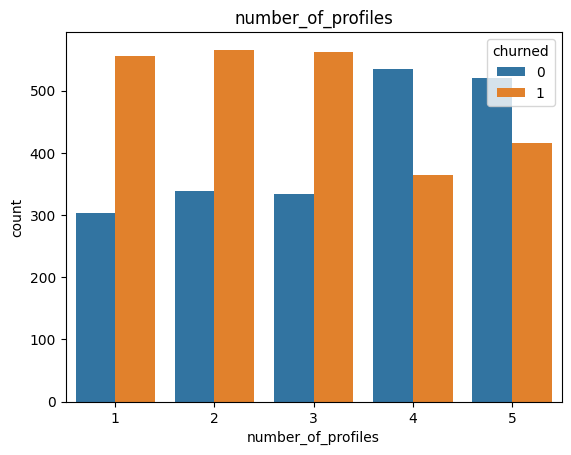

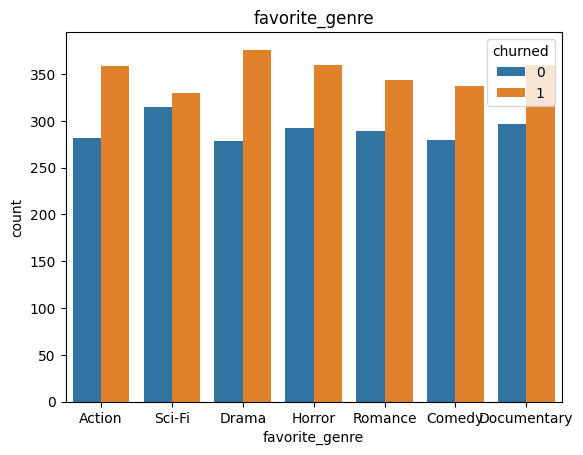

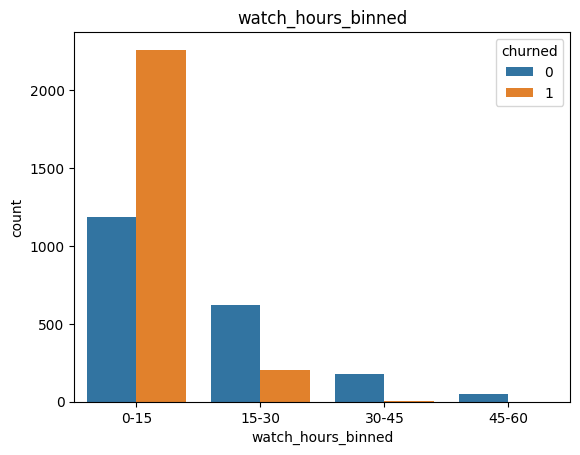

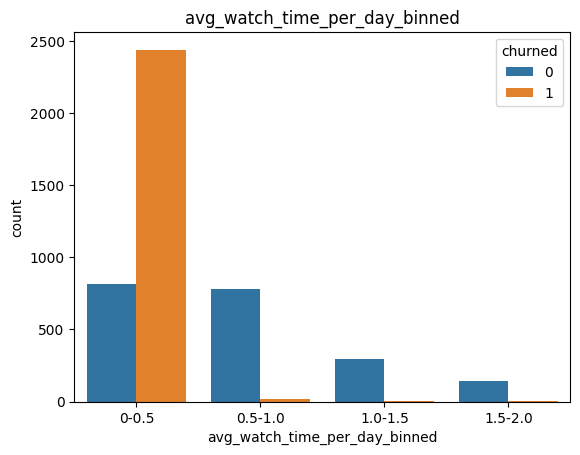

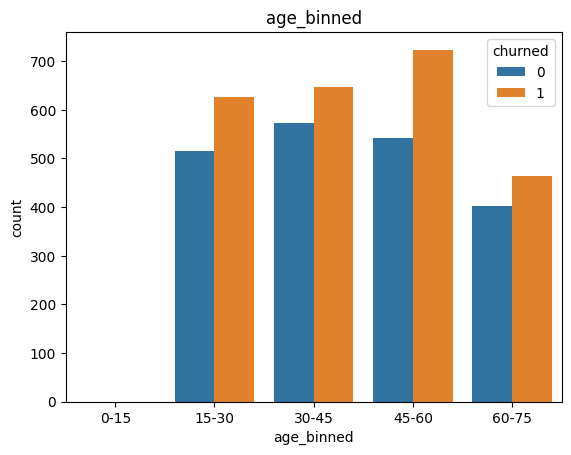

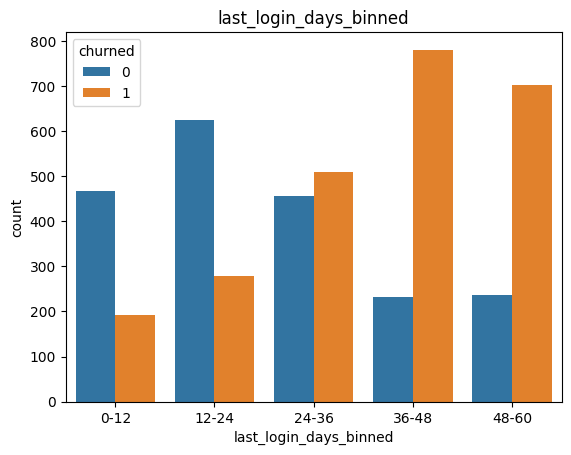

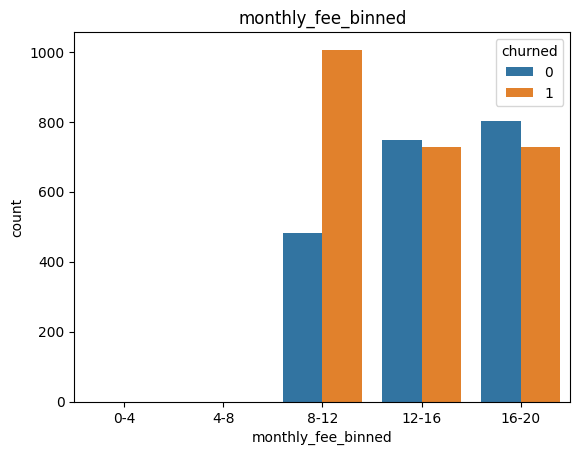

In [42]:
for i, col in enumerate(filtered_data[filtered_data.drop(columns = ["customer_id", "age","watch_hours", "last_login_days", "monthly_fee", "avg_watch_time_per_day"]).columns]):
  plt.figure()
  sns.countplot(data = filtered_data,x = col, hue = "churned")
  plt.title(col)


##**Insights with respect to churn**

**From Gender**
- The churn rate is high regardless of gender.
- But among the three, Females are more churners.

**From Subscription type**
- The customers on the basic subscription plan are more churners while premium users are most satisfied and retained customers.

**From Region**
- The churn rate is high regardless of the region but North America and Europe have more churn rate.

**From Device**
- Laptop and desktop users are more churners.

**From Payment method**
- It looks like users using stable payment methods like credit/debit card are more loyal whereas crypto and gift card users looks like maybe trail users or less committed.

**From No of profiles**
- Users with less profiles have high churn and vice versa for users with more profiles.
- More profiles = shared accounts = higher engagement --> less churn.

**From Favourite Genre**
- Genre preference might be linked to viewer satisfaction.
- Users whose favorite genre is Drama or Horror tend to churn more often, possibly due to content being consumed quickly or not providing long-term engagement.

**From Watch hours binned**
- Users with 0–15 total watch hours are more likely to churn, while those with higher watch hours are retained more.

**From avg watch time per day**
- Very low average daily watch time strongly correlates with user churn. Users who engage more tend to stay.

**From Age**
- Middle-aged users seem more likely to churn than younger or older groups. However, all age groups show a relatively balanced churn pattern, with churners often slightly outnumbering non-churners.

**From Last Login Days**
- Users who last logged in more than 36 days ago have much higher churn rates. Churn increases significantly with inactivity.

**From Monthly Fee**
- Lower-paying users are more likely to churn, possibly due to affordability concerns. Users paying more might be more engaged or invested.

## Bivariate Analysis

In [43]:
filtered_data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hours_binned,avg_watch_time_per_day_binned,age_binned,last_login_days_binned,monthly_fee_binned
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,0-15,0-0.5,45-60,24-36,8-12
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,0-15,0-0.5,45-60,12-24,12-16
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,15-30,1.0-1.5,15-30,0-12,12-16
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,0-15,0-0.5,45-60,0-12,16-20
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,0-15,0-0.5,45-60,12-24,12-16


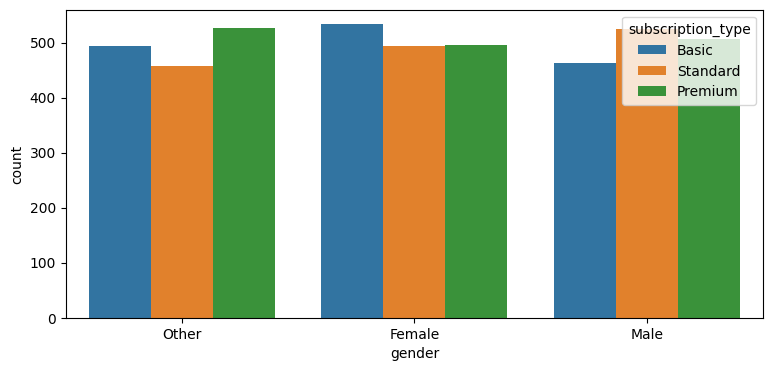

In [50]:
## Bivariate b/w gender and subscription type
plt.figure(figsize = (9,4))
sns.countplot(x = "gender", hue = "subscription_type", data = filtered_data)
plt.show()

###Across all genders, the Standard subscription type is the least popular. Females and the "Other" gender group show a slight preference for Premium over Basic, while males have a more balanced distribution.

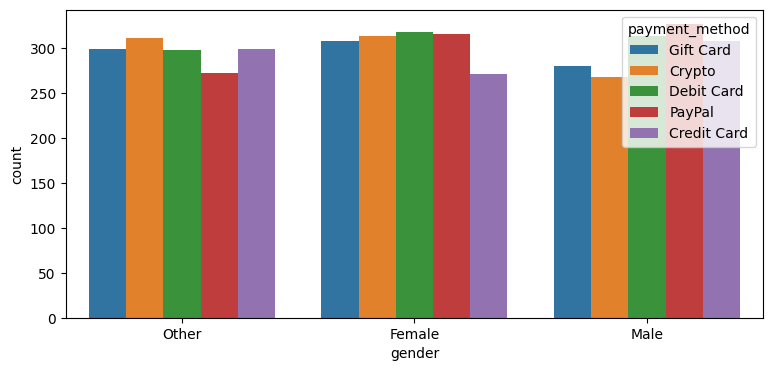

In [51]:
## Bivariate b/w gender and payment method
plt.figure(figsize = (9,4))
sns.countplot(x = "gender", hue = "payment_method", data = filtered_data)
plt.show()

###Females tend to prefer Debit Card and PayPal, while males slightly favor Gift Cards and Debit Cards. The "Other" gender category shows a higher usage of Gift Cards and Credit Cards.

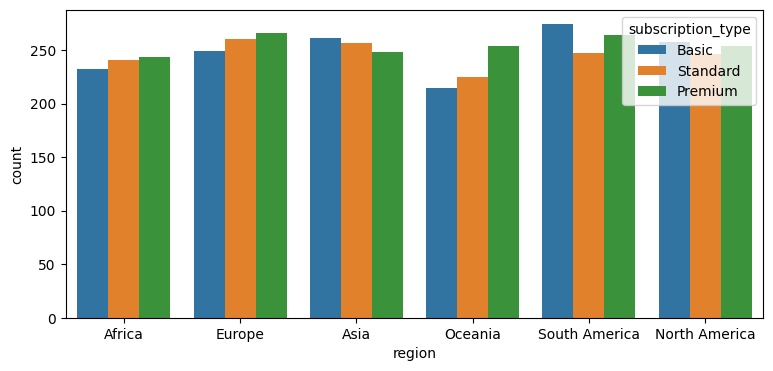

In [52]:
## Bivariate b/w gender and payment method
plt.figure(figsize = (9,4))
sns.countplot(x = "region", hue = "subscription_type", data = filtered_data)
plt.show()

 ### The popularity of subscription types varies by region. South America has the highest count of Basic subscribers, while Europe, Africa, and North America have the highest count of Premium subscribers.

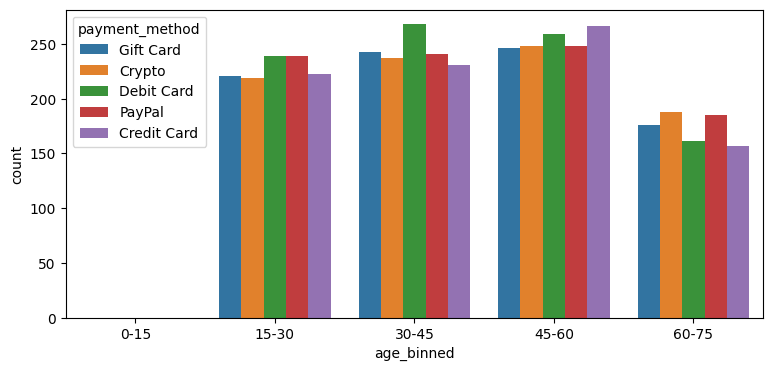

In [54]:
## Bivariate b/w age and payment method
plt.figure(figsize = (9,4))
sns.countplot(x = "age_binned", hue = "payment_method", data = filtered_data)
plt.show()

### Credit Cards are a popular payment method for the middle-aged groups (30-60). The oldest group (60-75) has a higher usage of Gift Cards, and the youngest group (0-15) has very few users overall.

/tmp/ipython-input-2671512730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "number_of_profiles", y = "subscription_type", data = filtered_data,  palette = ["orange", "blue","green"])


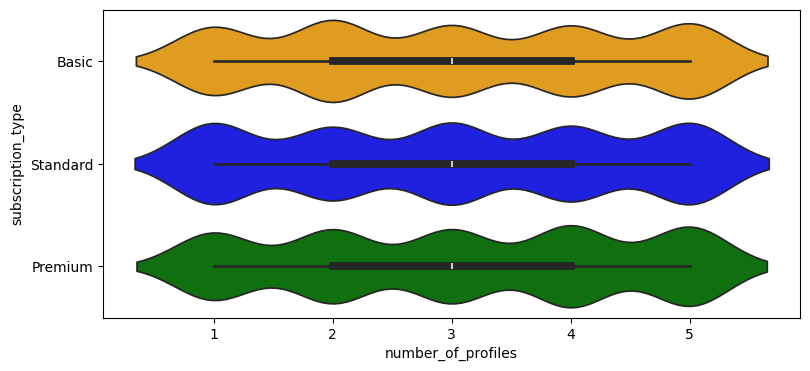

In [66]:
## Bivariate b/w no of profiles and subscription type
plt.figure(figsize = (9,4))
sns.violinplot(x = "number_of_profiles", y = "subscription_type", data = filtered_data,  palette = ["orange", "blue","green"])
plt.show()

### Most users, regardless of their subscription type, create between 2 and 4 profiles. The distribution of the number of profiles is very similar for Basic, Standard, and Premium plans.

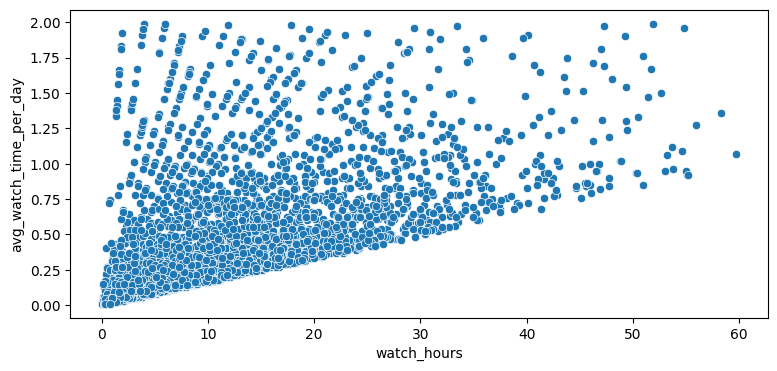

In [71]:
## Bivariate b/w watch_hours and avg_watch_time_per_day
plt.figure(figsize = (9,4))
sns.scatterplot(x = "watch_hours", y = "avg_watch_time_per_day", data = filtered_data)
plt.show()

### There is a clear link between a user's total watch hours and their average daily watch time; as one goes up, so does the other. Users who have watched a lot in total also tend to watch a lot each day.

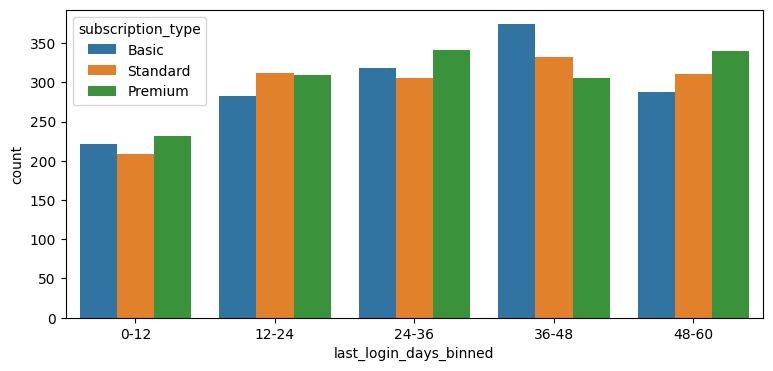

In [74]:
## Bivariate b/w last_login_days_binned	 and subscription_type
plt.figure(figsize = (9,4))
sns.countplot(x = "last_login_days_binned", hue = "subscription_type", data = filtered_data)
plt.show()

### Users who logged in very recently (0-12 days) tend to have Premium subscriptions more than other types.

### The highest number of users for all subscription types falls in the 36-48 days since last login group, with Basic being the most popular subscription in this bin.

### Premium subscriptions are most popular among users who logged in very recently (0-12 days) and less recently (48-60 days).

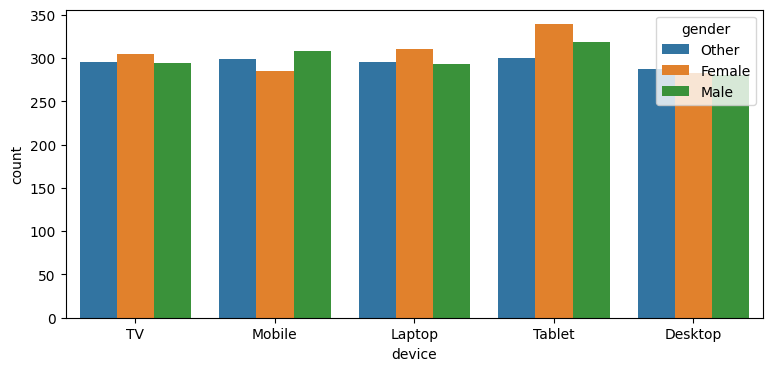

In [78]:
## Bivariate b/w device	 and gender
plt.figure(figsize = (9,4))
sns.countplot(x = "device", hue = "gender", data = filtered_data)
plt.show()

## Numerical Analysis

In [79]:
data_copy.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hours_binned
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,0-20
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,0-20
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,0-20
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,0-20
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,0-20


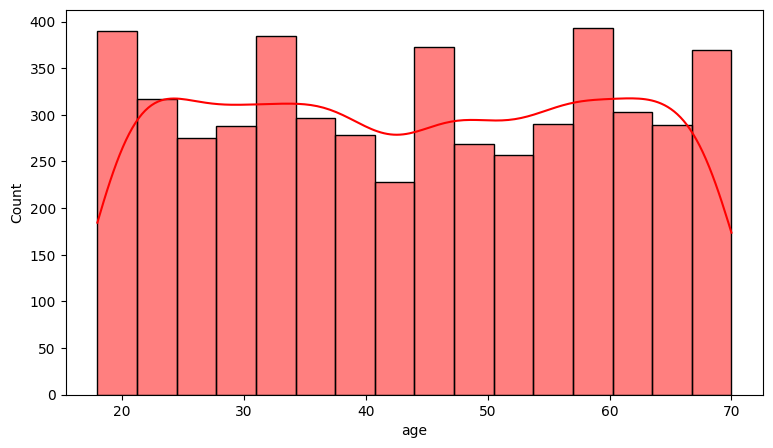

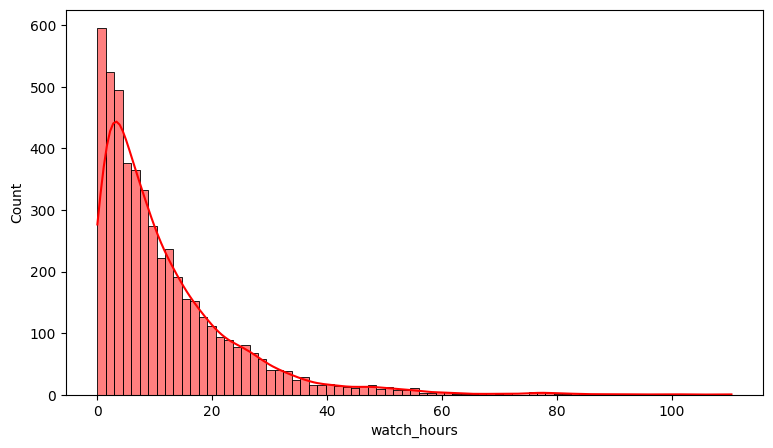

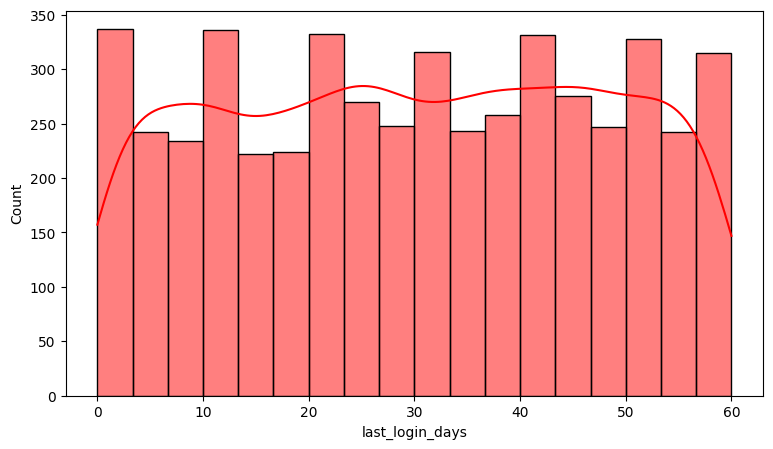

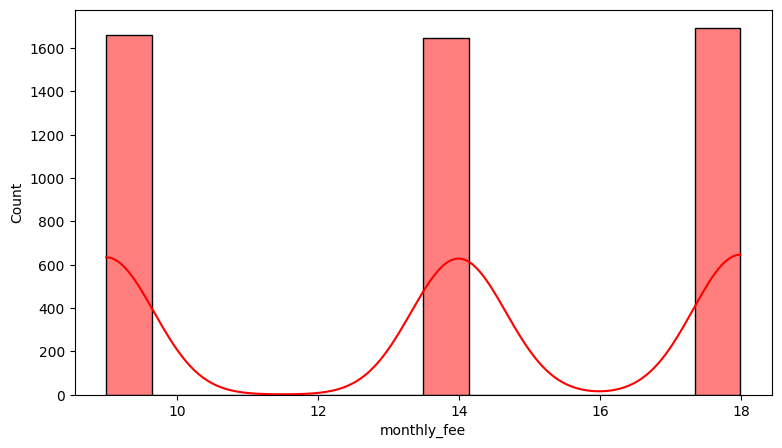

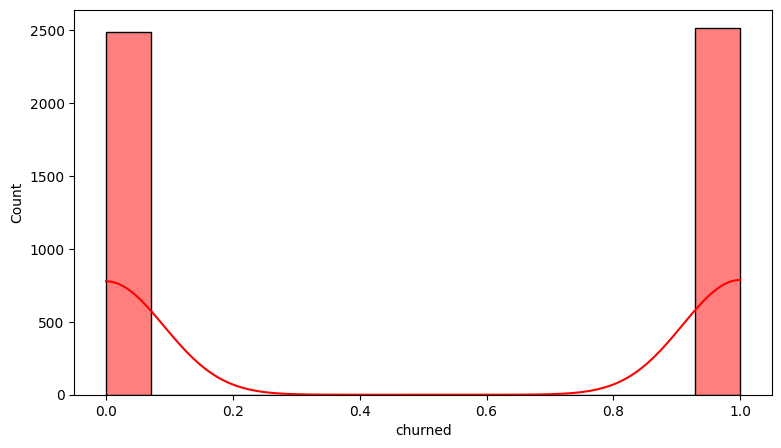

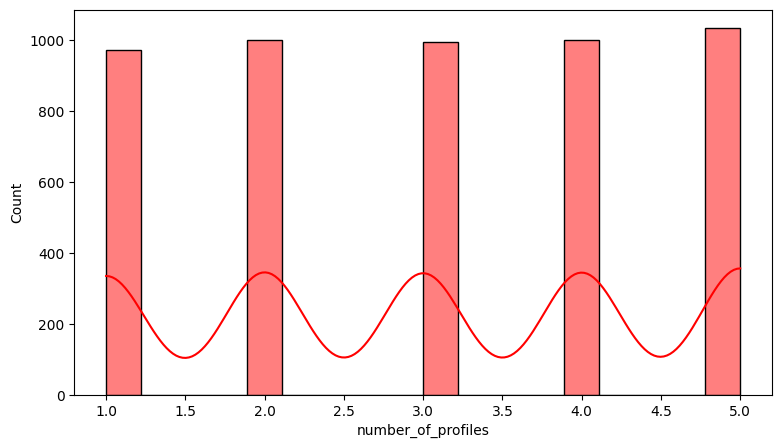

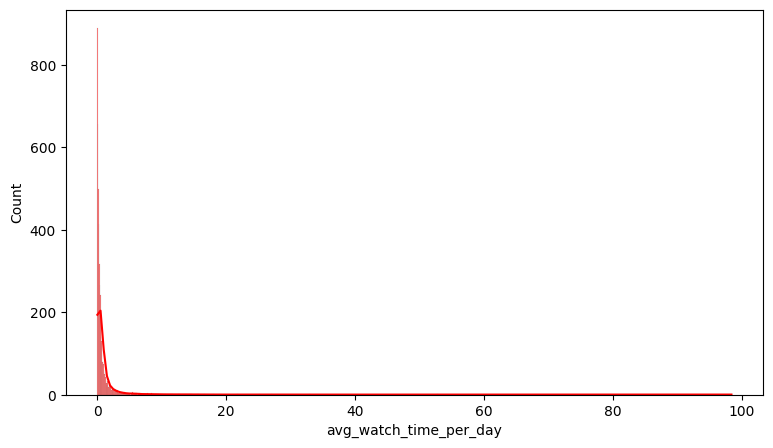

In [86]:
import numpy as np
numerical_cols = data_copy.select_dtypes(include = np.number).columns

for col in numerical_cols:
  plt.figure(figsize = (9,5))
  sns.histplot(data = data_copy, x = col, color = "red", kde = True)
  plt.show()

## **Insights**

**From Monthly Fee:**

- Users are grouped into three distinct price tiers, with most paying around $9.50, $14.00, or $17.50. There are almost no users with fees in between these prices.

**From Watch Time**

- The vast majority of users watch for a very short time each day. Similarly, most users have a low total number of watch hours.

**From Last Login**

- Users log in at a wide variety of intervals, with no single timeframe being overwhelmingly more common than others.